In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import torch
from MCMC import MCMC, muller_potential, potential_to_probability

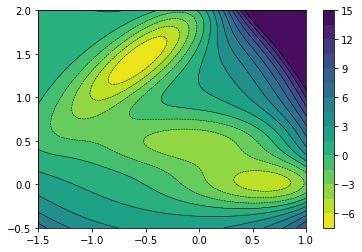

In [2]:
# plot muller potential
kbT = 2.479
x = np.linspace(-1.5, 1, 100)
y = np.linspace(-0.5, 2, 100)
X, Y = np.meshgrid(x, y)
Z = muller_potential([X, Y])
Z[Z>15] = 15
plt.contourf(X, Y, Z, 20, cmap=cm.viridis_r)
plt.colorbar()
plt.contour(X, Y, Z, 20, vmax=15, linewidths=0.5, colors='black')
plt.show()

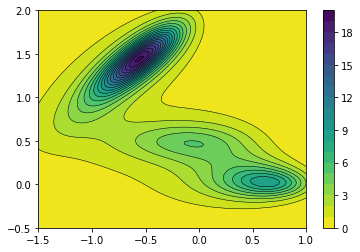

In [7]:
# plot muller potential
muller_prob = potential_to_probability(muller_potential, kbT=kbT)
P = muller_prob([X, Y])
plt.contourf(X, Y, P, 20, cmap=cm.viridis_r)
plt.colorbar()
plt.contour(X, Y, P, 20, linewidths=0.5, colors='black')
plt.show()

In [8]:
samples = MCMC(muller_prob, 10000, 0.1, [-0.5, 1.5], np.array([[-1.5, 1], [-0.5, 2]]))

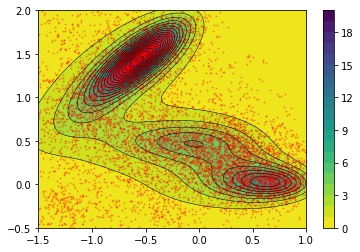

In [9]:
# plot muller potential with samples
plt.contourf(X, Y, P, 20, cmap=cm.viridis_r)
plt.colorbar()
plt.contour(X, Y, P, 20, linewidths=0.5, colors='black')
plt.scatter(samples[:, 0], samples[:, 1], s=1, c='red', alpha=0.3)
plt.show()